# Support Vector Machines for Classification

In [1]:
#import libraries

import numpy as np


#matplotlib
import matplotlib.pyplot as plt

#models
from sklearn import svm, datasets

#preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#model validation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score


%matplotlib inline

#use to read html
from bs4 import BeautifulSoup

In [9]:
# import some data to play with
#Use the classic iris dataset
iris = datasets.load_iris()

BeautifulSoup(iris.DESCR)

<html><body><p>.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ==

In [10]:
X = iris.data[:, :2]  # we only take the first two features. 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

In [11]:
# create four instances of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors


C = 1.0  # SVM regularization parameter, 1/lamda
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)


/Users/nathanielbozarth/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


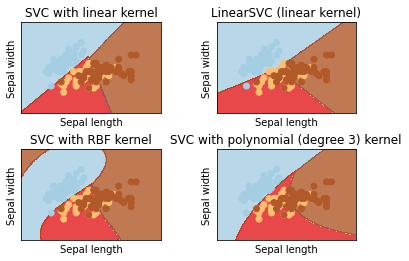

In [12]:
#Show SVM Plots
# create a mesh plot area in which to build plot
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


## How do our models work with unseen data?

In [13]:
#first, let's expand our feature space to use all features
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

C = 1.0  # SVM regularization parameter, 1/lamda
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
models = {'svc':svc, 'lin_svc':lin_svc, 'rbf_svc':rbf_svc, 'poly_svc':poly_svc}

for key, value in models.items():
    print(key)
    print("Accuracy Score: ", round(accuracy_score(y_test, value.predict(X_test)),2))
    print(classification_report(y_test, value.predict(X_test)))
    print("")
    
    

svc
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


lin_svc
Accuracy Score:  0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


rbf_svc
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00

/Users/nathanielbozarth/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Digits Dataset

In [2]:
digits = datasets.load_digits()

BeautifulSoup(digits.DESCR)

<html><body><p>.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are coun

In [3]:
X = digits.data  
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y)

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (1797, 64)
y shape:  (1797,)


In [4]:
C = 1.0  # SVM regularization parameter, 1/lamda
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
models = {'svc':svc, 'lin_svc':lin_svc, 'rbf_svc':rbf_svc, 'poly_svc':poly_svc}


for key, value in models.items():
    print(key)
    print("Accuracy Score: ", round(accuracy_score(y_test, value.predict(X_test)),2))
    print(classification_report(y_test, value.predict(X_test)))
    print("")

/Users/nathanielbozarth/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


svc
Accuracy Score:  0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       0.98      0.98      0.98        55
           4       1.00      1.00      1.00        54
           5       0.95      1.00      0.97        55
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        54
           8       1.00      0.88      0.94        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


lin_svc
Accuracy Score:  0.94
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.84      0.95      0.89        55
           2       1.

/Users/nathanielbozarth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nathanielbozarth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nathanielbozarth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

 ## Grid Search

 What about if we grid search it and choose F1 as our error metric?

In [5]:

param_grid = [
    {'kernel': ['linear', 'rbf', 'sigmoid'],
      'C': [.5, 1, 5]},
    {'kernel': ['poly'],
      'degree': [2, 3, 4],
      'C': [.5, 1, 5]}
    ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 5],
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': [0.5, 1, 5], 'degree': [2, 3, 4],
                          'kernel': ['poly']}])

In [6]:
clf.best_params_

{'C': 1, 'degree': 2, 'kernel': 'poly'}

In [7]:
best = svm.SVC()
best.set_params(**clf.best_params_)
best.fit(X_train, y_train)


print("Accuracy Score: ", round(accuracy_score(y_test, best.predict(X_test)),2))
print(classification_report(y_test, best.predict(X_test)))


Accuracy Score:  0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.97      0.97      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [8]:
scores = cross_val_score(best, X_train, y_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()    

Cross Validation Score for each K [0.98611111 0.99305556 1.         0.99305556 0.99305556 0.95833333
 0.97916667 1.         0.99300699 0.98601399]


0.9881798756798756